In [29]:
import numpy as np
from matplotlib import pyplot as plt

# I: Simulation of Rademacher Distribution

In [11]:
def rademacher(M: int, p: float) -> np.ndarray:
    rng = np.random.default_rng()
    return np.where(rng.random(M) < p, 1, -1)


M = 1000
p = 0.6
X = rademacher(M, p)

emp_mean = X.mean()
sample_var = X.var(ddof=1)
pop_var = X.var(ddof=0)

theo_mean = 2 * p - 1
theo_var = 4 * p * (1 - p)

print(f"Empirical mean      : {emp_mean:.6f}")
print(f"Theoretical mean    : {theo_mean:.6f}")
print(f"Sample variance     : {sample_var:.6f} (ddof=1)")
print(f"Population variance : {pop_var:.6f} (ddof=0)")
print(f"Theoretical variance: {theo_var:.6f}")


Empirical mean      : 0.236000
Theoretical mean    : 0.200000
Sample variance     : 0.945249 (ddof=1)
Population variance : 0.944304 (ddof=0)
Theoretical variance: 0.960000


# II: Simulations of a random walk

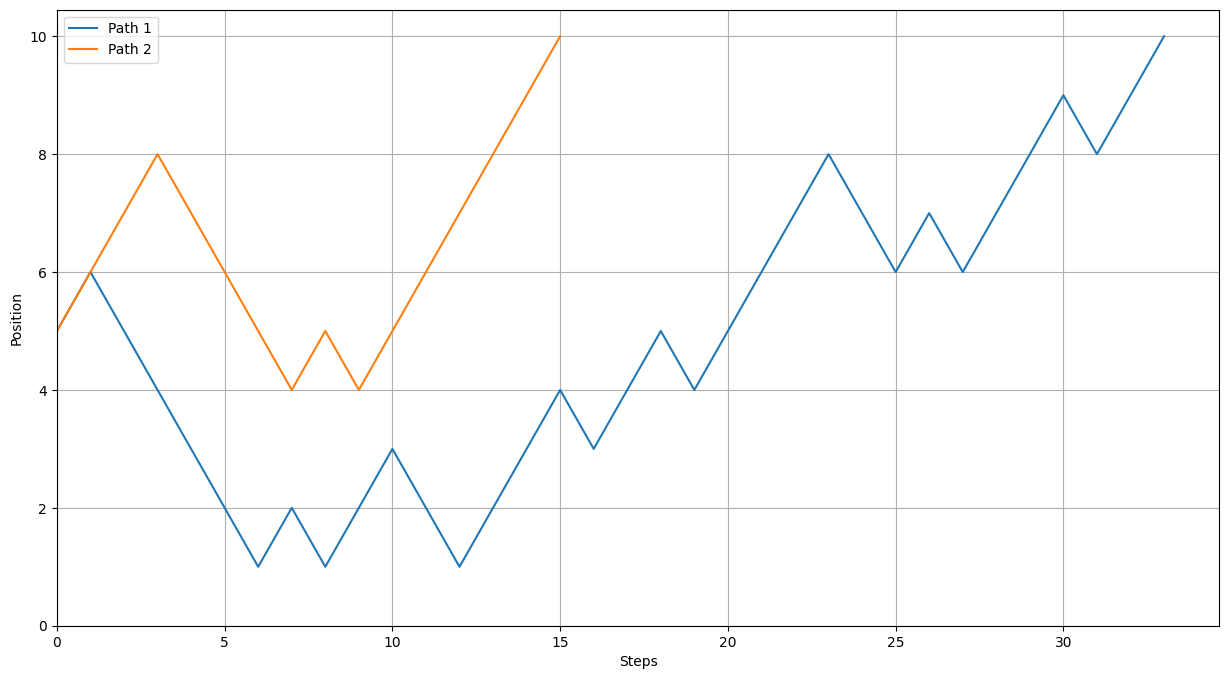

In [39]:
S_0 = 5


def random_walk(start: int, count: int) -> np.ndarray:
    steps = rademacher(count, p)
    steps = np.insert(steps, 0, start)
    return steps


def random_walk_until(start: int, until: tuple[int, int], p: float) -> np.ndarray:
    """until could be upper or lower"""
    S_n = start
    path = [start]

    lower, upper = until

    while S_n != upper and S_n != lower:
        step = rademacher(1, p)[0]
        S_n += step
        path.append(S_n)

    return np.array(path)


path_1 = random_walk_until(S_0, (0, 10), p)
len_path_1 = len(path_1)

path_2 = random_walk_until(S_0, (0, 10), p)
len_path_2 = len(path_2)

plt.figure(figsize=(15, 8))
plt.plot(path_1, label="Path 1")
plt.plot(path_2, label="Path 2")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()
plt.show()

# III: Simulation of a random walk

## 1: Draw 1,000 paths...

In [60]:
paths = {}
exit = (0, 10)
p = 0.6
M = 1000

for i in range(M):
    path = random_walk_until(start=S_0, until=exit, p=p)
    paths[f"path_{i+1}"] = path

In [61]:
def theoretical_bankrupt(p: float, start: int, win_amount: int) -> float:
    bankrupt_term = p / (1 - p)
    return (1 - bankrupt_term**start) / (1 - bankrupt_term**win_amount)


theoretical_bankrupt_rate = theoretical_bankrupt(p, S_0, exit[1])
theoretical_win_rate = 1 - theoretical_bankrupt_rate

exit_lower = sum([path[-1] == 0 for path in paths.values()])
exit_upper = len(paths) - exit_lower
print(f"Theoretical Bankrupt Frequency = {theoretical_bankrupt_rate * 100:.2f}")
print(f"Actual Bankrupt Frequency = {exit_lower * 100 / len(paths):.2f}%")

print(f"Theoretical Winning Frequency = {theoretical_win_rate * 100:.2f}")
print(f"Actual Winning Frequency = {exit_upper * 100 / len(paths):.2f}%")

Theoretical Bankrupt Frequency = 11.64
Actual Bankrupt Frequency = 12.60%
Theoretical Winning Frequency = 88.36
Actual Winning Frequency = 87.40%


## Same problem, but change the p = 0.1

In [65]:
p = 0.1

for i in range(M):
    path = random_walk_until(start=S_0, until=exit, p=p)
    paths[f"path_{i+1}"] = path

theoretical_bankrupt_rate = theoretical_bankrupt(p, S_0, exit[1])
theoretical_win_rate = 1 - theoretical_bankrupt_rate

exit_lower = sum([path[-1] == 0 for path in paths.values()])
exit_upper = len(paths) - exit_lower
print(f"Theoretical Bankrupt Frequency = {theoretical_bankrupt_rate*100:6f}")
print(f"Actual Bankrupt Frequency = {exit_lower * 100 / len(paths):.6f}%")

print(f"Theoretical Winning Frequency = {theoretical_win_rate * 100:.6f}")
print(f"Actual Winning Frequency = {exit_upper * 100 / len(paths):.6f}%")


Theoretical Bankrupt Frequency = 99.998307
Actual Bankrupt Frequency = 100.000000%
Theoretical Winning Frequency = 0.001693
Actual Winning Frequency = 0.000000%


## 2. Now 10,000 samples, and equal probabilities

In [ ]:
p = 0.5
M = 10000


def theoretical_win_equal_probability(start: int, target: int) -> float:
    return start / target


for i in range(M):
    path = random_walk_until(start=S_0, until=exit, p=p)
    paths[f"path_{i+1}"] = path


In [73]:
theoretical_win_rate = theoretical_win_equal_probability(S_0, exit[1])
theoretical_bankrupt_rate = 1 - theoretical_win_rate

exit_lower = sum([path[-1] == 0 for path in paths.values()])
exit_upper = len(paths) - exit_lower
print(f"Theoretical Bankrupt Frequency = {theoretical_bankrupt_rate * 100:.2f}%")
print(f"Actual Bankrupt Frequency = {exit_lower * 100 / len(paths):.2f}%")

print(f"Theoretical Winning Frequency = {theoretical_win_rate * 100:.2f}%")
print(f"Actual Winning Frequency = {exit_upper * 100 / len(paths):.2f}%")


Theoretical Bankrupt Frequency = 50.00%
Actual Bankrupt Frequency = 50.31%
Theoretical Winning Frequency = 50.00%
Actual Winning Frequency = 49.69%
